In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# dataset import
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

NameError: name 'keras' is not defined

The images are 28x28 numpy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These corresponds to the class of clothing the image represents:

| Label | Class |
|-|-|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle Boot |


In [3]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle Boot"
]

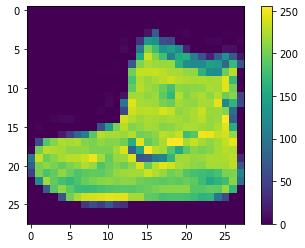

In [4]:
# displaying random images
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
# Scale the hex color values from 0-255 to 0-1 before 
# feeding them to the neural networl model.
train_images = train_images/255.0
test_images = test_images/255.0

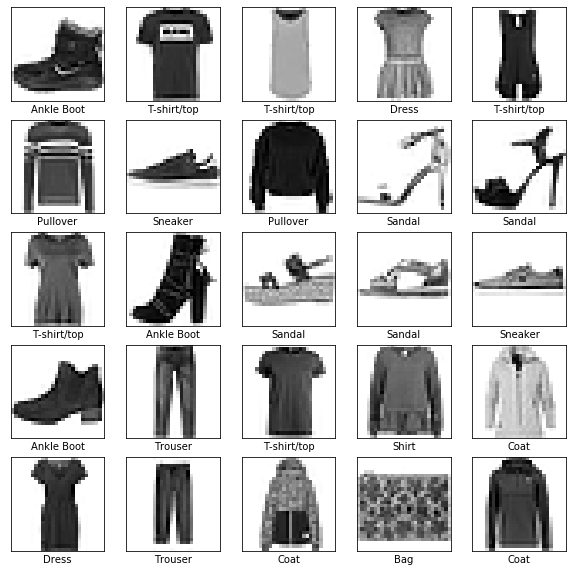

In [6]:
# To verify that the data form is in the right formal, 
# display the firts 25 images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
from tensorflow.keras.layers import Flatten, Dense

model = keras.Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(128, activation = "relu"),
    Dense(10, activation = "softmax")
])

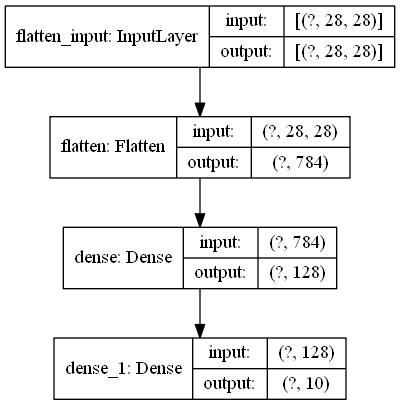

In [19]:
from tensorflow.keras.utils import plot_model
import os

# add Grpahwiz to path variable
os.environ["PATH"] += os.pathsep + "D:/Program Files (x86)/Graphviz2.38/bin/"

plot_model(
    model,
    show_shapes = True,
    expand_nested = True
)

In [9]:
model.compile(optimizer = "adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [25]:
history = model.fit(
    train_images, 
    train_labels,
    validation_split = 0.25,
    epochs = 10
)

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 3s 65us/sample - loss: 0.1701 - accuracy: 0.9357 - val_loss: 0.1882 - val_accuracy: 0.9283
Epoch 2/10
45000/45000 [==============================] - 3s 75us/sample - loss: 0.1677 - accuracy: 0.9360 - val_loss: 0.1795 - val_accuracy: 0.9326
Epoch 3/10
45000/45000 [==============================] - 3s 67us/sample - loss: 0.1605 - accuracy: 0.9397 - val_loss: 0.1811 - val_accuracy: 0.9288
Epoch 4/10
45000/45000 [==============================] - 3s 67us/sample - loss: 0.1542 - accuracy: 0.9426 - val_loss: 0.1891 - val_accuracy: 0.9283
Epoch 5/10
45000/45000 [==============================] - 3s 67us/sample - loss: 0.1517 - accuracy: 0.9428 - val_loss: 0.2023 - val_accuracy: 0.9237
Epoch 6/10
45000/45000 [==============================] - 4s 82us/sample - loss: 0.1474 - accuracy: 0.9449 - val_loss: 0.2058 - val_accuracy: 0.9234
Epoch 7/10
45000/45000 [==============================] 

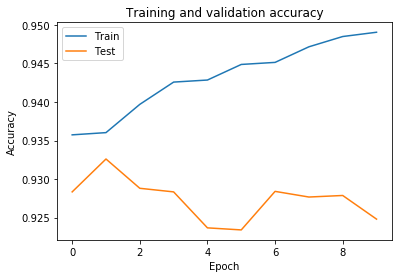

In [28]:
# plot training and validation accuracy values
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Training and validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

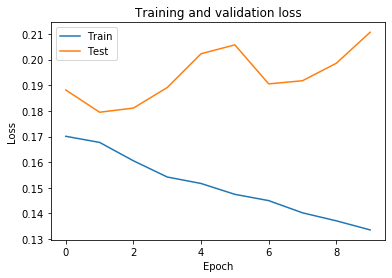

In [29]:
# plot training and validation accuracy values
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Training and validation loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

In [33]:
# accuracy evaluation
test_loss, test_acc = model.evaluate(
                        test_images,
                        test_labels,
                        verbose = 2
                    )

print("\nTest Accuracy: ", test_acc)
print("\nTest Loss: ", test_loss)

10000/10000 - 0s - loss: 0.4139 - accuracy: 0.8888

Test Accuracy:  0.8888

Test Loss:  0.4139209751024842


## Prediction

Depending on the output of neural network, the model will predict the label for each image in the testing set. The prediction array represents the confidence that the image corresponds to each of the 10 different article of clothing.

In [38]:
# prediction
predictions = model.predict(test_images)

# check the confidence of the first image
print("Model confidence against each label:\n")
print(predictions[0])
print("\n")

# check highest confidence
print("Highest confidence value: \n")
print(np.argmax(predictions[0]), "->", class_names[np.argmax(predictions[0])])

Model confidence against each label:

[2.5281725e-15 9.8745957e-15 9.1781195e-15 5.7077980e-19 5.6276571e-17
 2.1687466e-08 1.3894053e-14 1.6900303e-04 6.4460989e-14 9.9983096e-01]


Highest confidence value: 

9 -> Ankle Boot


In [76]:
def plot_image(i, prediction_array, true_label, img):
    
    prediction_array, true_label, img = prediction_array, true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(prediction_array)
    
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
        
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(prediction_array),
        class_names[true_label]),
        color = color
    )
    
def plot_value_array(i, prediction_array, true_label):
    prediction_array, true_label = prediction_array, true_label[i]
    
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    this_plot = plt.bar(
        range(10), 
        prediction_array, 
        color = "#777777"
    )
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction_array)
    
    this_plot[predicted_label].set_color("red")
    this_plot[true_label].set_color("blue")
            

## Verifying predictions


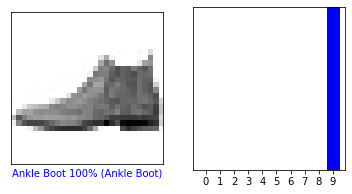

In [77]:
# verify the first sample image

i = 0
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

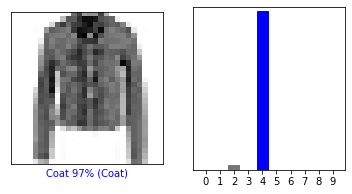

In [78]:
# verify the 10th sample image

i = 10
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

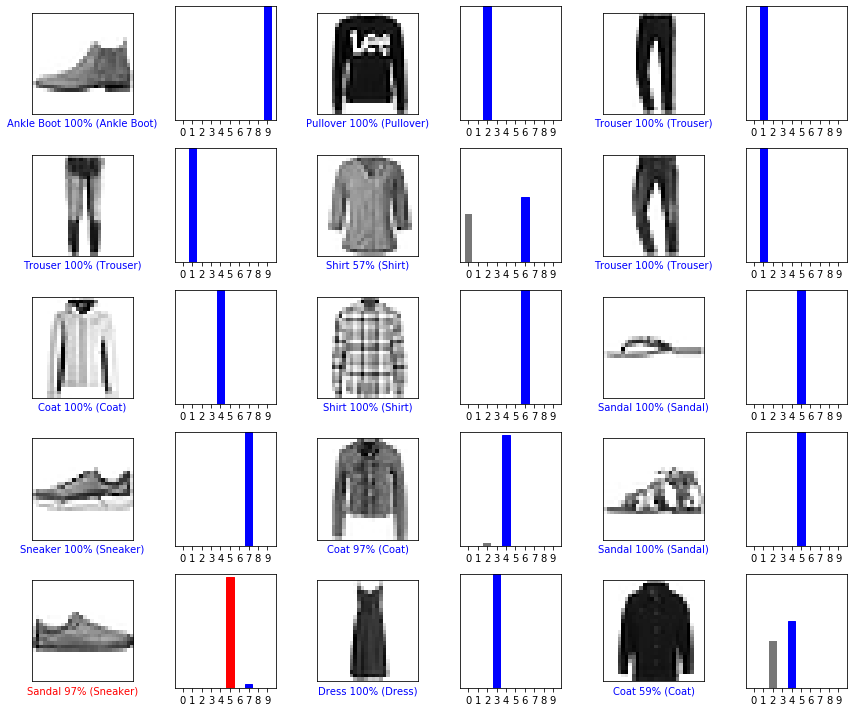

In [79]:
# plot several prediction at the same time

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2 * i + 1)
    plot_image(i , predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

## Using the trained model

Image shape  (1, 28, 28)
Prediction array: 
 [[4.0336552e-08 7.2129739e-17 3.2888148e-02 5.6383243e-14 1.7732911e-01
  4.7594855e-11 7.8978276e-01 5.6277153e-12 6.5220094e-14 9.1725044e-11]]


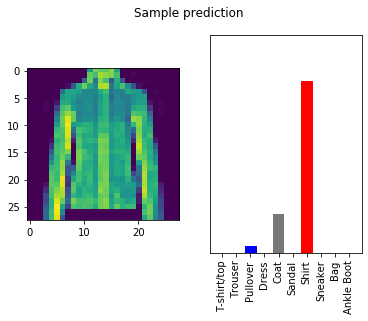

In [105]:
sample_image = test_images[57]

# place image into array of image (keras model are
# optimized to make prediction on a batch)
sample_image = np.expand_dims(sample_image, 0)
print("Image shape ", sample_image.shape)

predictions_single = model.predict(sample_image)
print("Prediction array: \n", predictions_single)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(sample_image[0])
plt.grid(False)
plt.subplot(1, 2, 2)
plot_value_array(1, predictions_single[0], test_labels)
plt.xticks(range(10), class_names, rotation = 90)
plt.suptitle("Sample prediction")
plt.show()